# Predicting Hotel Reservation Cancellations

Morgan Nash

December 2026

Business Understanding

Data Understanding

Data Preparation

Modeling

Evaluation

Code Quality

# Business Understanding

Maintaining occupancy is a huge challenge for the modern hotel industry. Intense competition, outdated technology systems, as well as the ease of online booking (and cancelling), are just a few of the issues that hotels are required to battle. It goes without saying that every cancelled booking means revenue is lost. 

* Aggressive pricing from competitors, along with the rise of short-term rental platforms like AirBnb, make guest retention increasingly difficult.
  
* On top of that, many of the hotel reservation systems are outdated and lack the capabilities that are needed to predict customer behavior, limiting the reliability of reservation projections.
  
* Another reason for occupancy struggles is the ease of online booking and common "free cancellation" policies. This allows for customers to make multiple reservations simultaneously, which greatly increases the chance of last-minute cancellations.

With all of this, it's not shocking that your hotel is having issues with cancelled reservations, and we understand the immediate need for a predictive intervention system. 

We are hoping to help with that by creating a classification model that predicts when a hotel reservation is "high risk" so your team can intervene and reach out with incentives to secure the booking.

# Data Understanding

This project uses the Hotel Reservations Dataset, accessed via [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data), and contains 36,275 records detailing customer reservations and characteristics from 2017 to 2018. This **Data Dictionary**, taken from the dataset's Kaggle page, describes each of the 19 columns: 

**Booking_ID:** unique identifier of each booking

**no_of_adults:** Number of adults

**no_of_children:** Number of Children

**no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan:** Type of meal plan booked by the customer:

**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time:** Number of days between the date of booking and the arrival date

**arrival_year:** Year of arrival date

**arrival_month:** Month of arrival date

**arrival_date:** Date of the month

**market_segment_type:** Market segment designation

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status:** Flag indicating if the booking was canceled or not.

### Why is this Dataset a good choice?

This dataset is a good choice for this project for the following reasons:

1. It contains **real data**, rather than synthethic. This data represents genuine booking activity from a single hotel, although the hotel location is undisclosed. This means our classification model will learn patterns based on real data which allows us to derive practical insights from the real customer behavior.

2. It has a **binary target:** booking_status ('Canceled' or 'Not_Canceled')

3. It contains a mix of variables that can be tied to a customer's likelihood to cancel including:
    * **Customer Demographics:** number of adults and children, whether customer was a repeat guest or not
    * **Customer Behavior:** number of weekend and weeknights booked, type of meal plan, lead time (days between booking and arrival), special requests, past booking history, whether or not a parking space was required
    * **Financial & Operational Information:** Average room price, room type  

### What Limitations exist for this Dataset?

The following list contains this dataset's primary limitations, and focuses on factors that could impact the model's generalizability:

**Limited Geographic Scope and Timeline:** The data is restricted to a 1 hotel only and is slightly outdated with the latest record from 2018 (before the Covid-19 Pandemic). The hotel location is also undisclosed. The dataset creator, [Ahsan Raza](https://www.kaggle.com/ahsan81/datasets), commented in the Discussion section: "This example data has been captured from single location/country which, due to discretionary reasons, cannot be disclosed." This adds a limit to the model's ability to generalize well to other locations after 2018.

**Missing External and Factors:** The dataset lacks external and economic influences. Information about competitor pricing, weather forecasts, or large events taking place nearby are just to name a few outside factors that frequently drive cancellation decisions, but they are invisible to the current model.

**Lack of Detailed Guest and Pricing Data:** Certain customer demographic details (like age and income), as well as records of the actual price paid by the customers (only the average is included) are absent. This limits the model's ability to truly understand a customer's price sensitivity.

**Feature Ambiguity:** Interpretation is hampered by the ciphered room type values, which cannot be leveraged fully without the encoding key, which is not included. This prevents us from deriving insights about specific room types.

# Data Preparation:

For Google Colab:

In [ ]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==0.24.2

In [63]:
# import json
# import pandas as pd
# import os
# from pathlib import Path
# import zipfile


# # your api key
# api_key = {
# 'username':"username" ,
# 'key':"some_api_key"}

# # uses pathlib Path
# kaggle_path = Path('/root/.kaggle')
# os.makedirs(kaggle_path, exist_ok=True)

# # opens file and dumps python dict to json object 
# with open (kaggle_path/'kaggle.json', 'w') as handl:
#     json.dump(api_key,handl)

# os.chmod(kaggle_path/'kaggle.json', 600)

In [2]:
# !kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

In [3]:
# zip_file_name = 'hotel-reservations-classification-dataset.zip'

# csv_file_name = 'Hotel Reservations.csv'

# with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
#     # Extract the specific CSV file to the current directory
#     zip_ref.extract(csv_file_name) 

# data = pd.read_csv(csv_file_name)
# print(data.head())

I started by loading and exploring the data



.


### Import Libraries, Load and Preview Dataset:

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [65]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 0.24.2


In [5]:
#load data and preview
data = pd.read_csv('data/hotel_reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
#check for shape, nulls, dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#check statistics of numerical columns
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
#see distribution of the target, booking_status, as a percentage
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

##### Numerical Columns Initial Observations: 
* The required_car_parking_space and repeated_guest columns should be treated as categorical (0, or 1).
* There are outliers in the following columns:
    - lead_time
    - no_of_children (75th percentile is still 0.0, max is 10)
    - no_of_week_nights (75th percentile is 3, max is 17)
    - no_of_previous_cancellations (75th percentile is 0, max is 13)
    - no_of_previous_bookings_not_cancelled (75th percentile is 0, max is 58)
* I am curious if there are any records where no_of_weekend_nights and no_of_week_nights for a certain record are both 0.

### Data Cleaning & Feature Engineering:

In this section, we:
* check for duplicate rows
* drop Booking_ID column
* address some of the low-frequency categories found in a column's value counts by consolidating
* make sure binary/discrete integer columns are changed to data type 'object' (required_car_parking_space, repeated_guest, and arrival_year(because there are only 2 years)) so they'll be treated as categorical
* manually add a maximum cap to certain numerical columns to handle their outliers
* create a column 'is_cancelled' that maps the values in 'booking_status' to 1 or 0: 'Cancelled' to 1 and 'Not_Cancelled' to 0
* check for (and drop) records where the total number of nights is zero

In [9]:
#check for duplicate entries
data['Booking_ID'].duplicated().sum()

0

In [10]:
#drop Booking_ID column as it will not help with predicting target
data = data.drop('Booking_ID', axis=1)

In [11]:
#create a list of columns to check their value_counts
cols_to_check= ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type',
                'repeated_guest', 'no_of_special_requests', 'booking_status']

#loop through columns and print value counts for each
for col in cols_to_check:
    print(f"\n- Value Counts for: {col} -")
    print(data[col].value_counts())


- Value Counts for: type_of_meal_plan -
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

- Value Counts for: required_car_parking_space -
0    35151
1     1124
Name: required_car_parking_space, dtype: int64

- Value Counts for: room_type_reserved -
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

- Value Counts for: arrival_year -
2018    29761
2017     6514
Name: arrival_year, dtype: int64

- Value Counts for: market_segment_type -
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

- Value Counts for: repeated_guest -
0    35345
1      930
Name: repeated_guest, dtype: int64

- Value Counts for: no_of_special_requests -
0    19777
1    11373
2     4364
3      675
4     

In [12]:
#for type_of_meal_plan, "Meal Plan 3" only accounts for 5 entries, I combine those 5 with "Not Selected"
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace('Meal Plan 3', 'Not Selected')

In [13]:
#check new value counts
data['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5135
Meal Plan 2      3305
Name: type_of_meal_plan, dtype: int64

In [14]:
#for room_type_reserved, I combine "Room_Type 3" and "Room_Type 7" into "Other" as they are the least common room types
data['room_type_reserved'] = data['room_type_reserved'].replace(('Room_Type 3', 'Room_Type 7'), 'Rare')

In [15]:
#check new value counts
data['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Rare             165
Name: room_type_reserved, dtype: int64

In [16]:
#create list of integer columns to treat as categorical
cols_to_obj = ['arrival_year', 'required_car_parking_space', 'repeated_guest']
#loop through the columns and change the datatype to 'object'
for col in cols_to_obj:
    data[col] = data[col].astype('object')

In [17]:
#create a column where Canceled is encoded as 1 (positive class, representing high risk) and Not_Canceled is 0 from booking_status
data['is_canceled'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

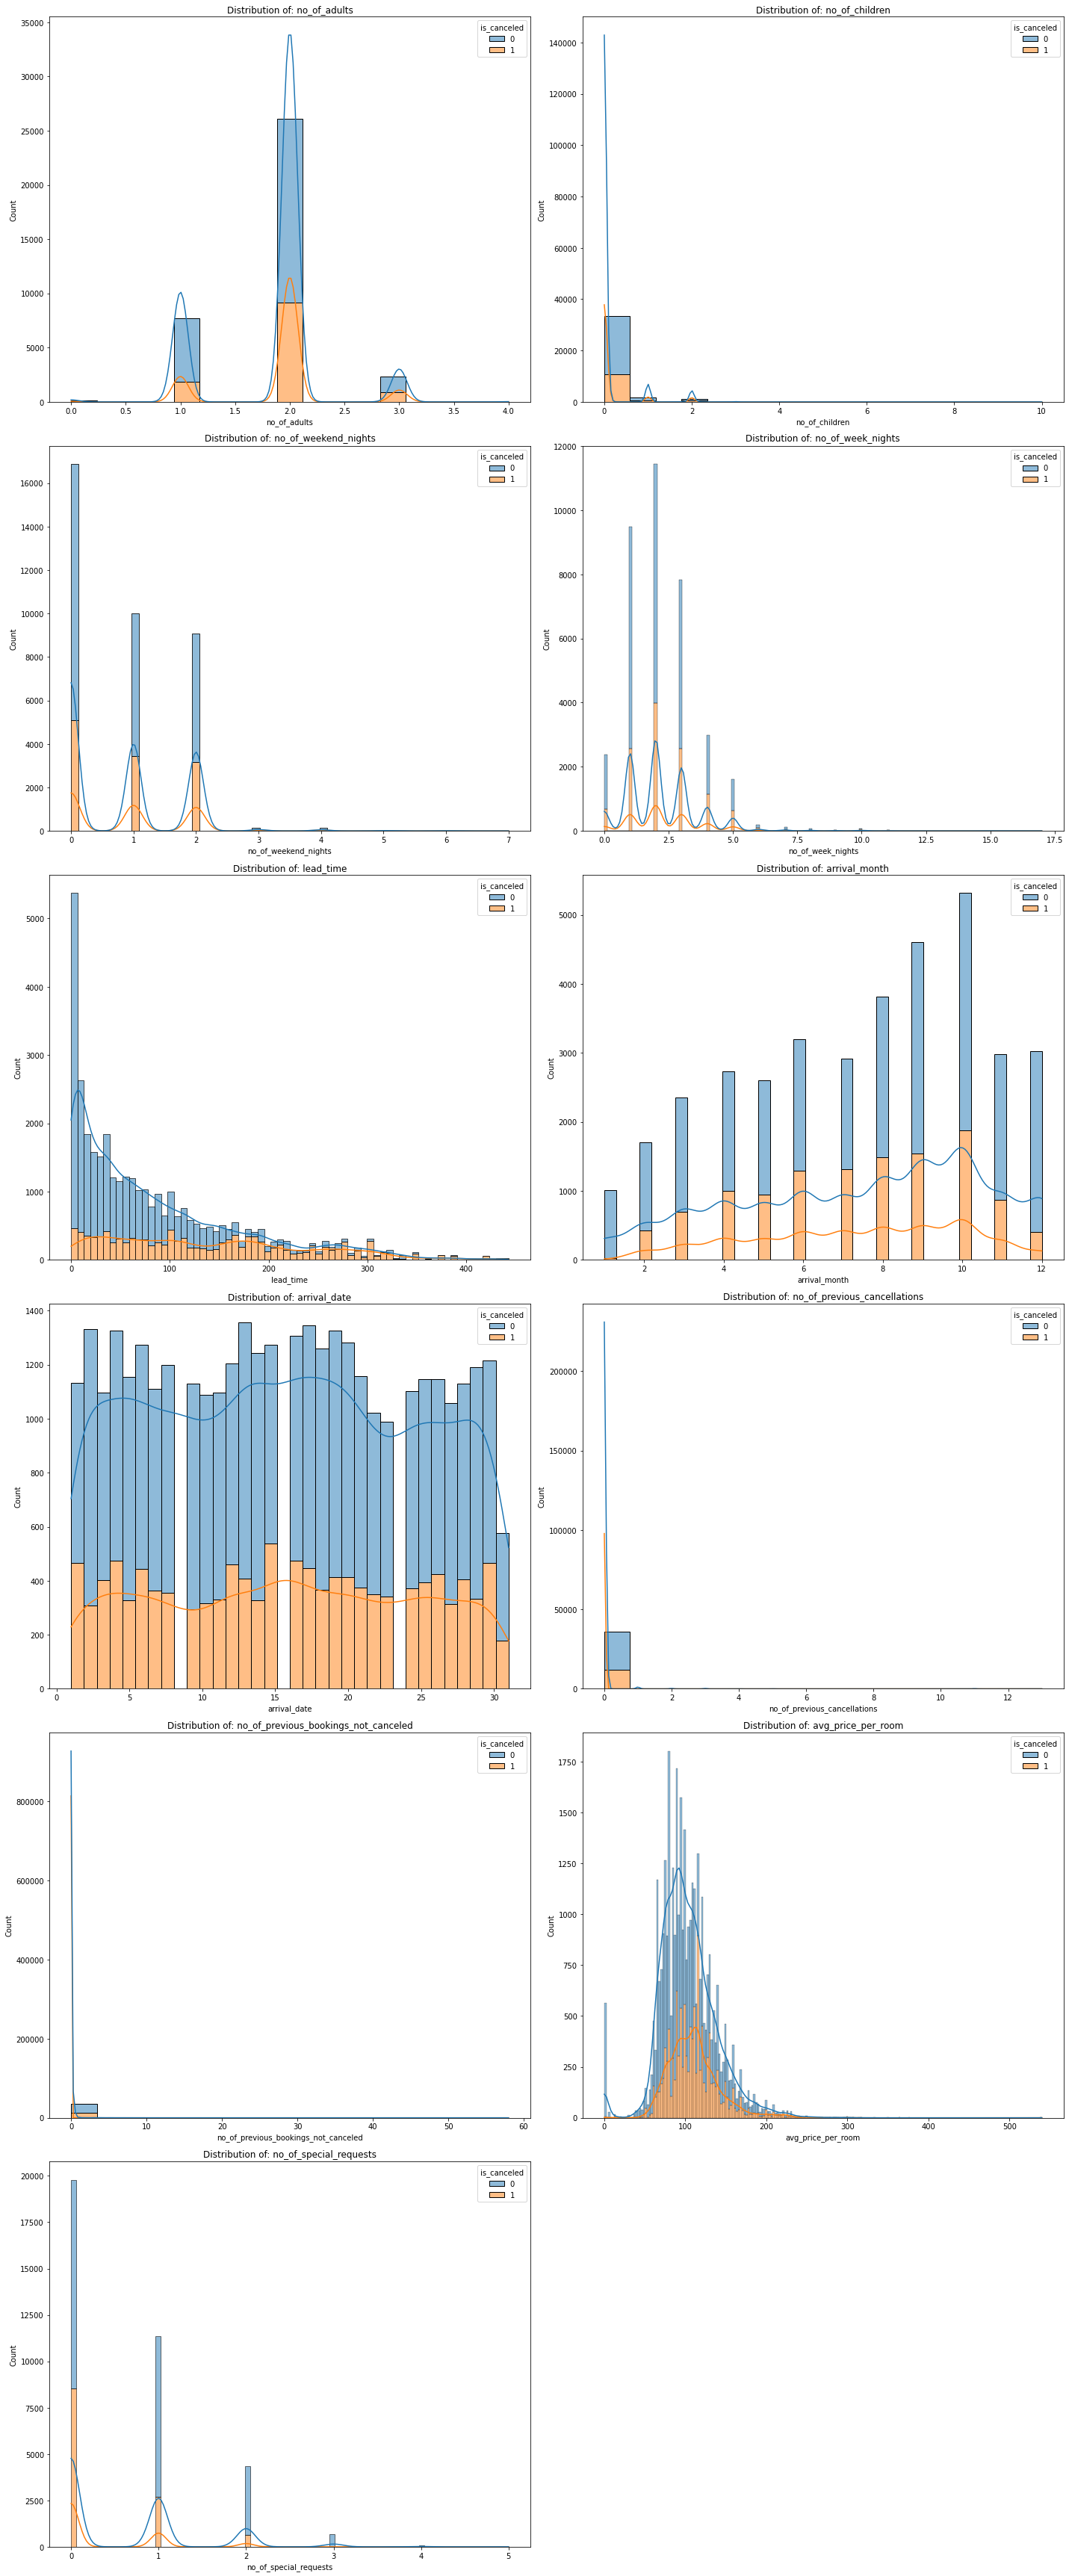

In [18]:
#plot distribution of numeric columns:

#define numeric columns:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

#create list of columns to plot that includes numeric_cols but excludes 'is_canceled':
cols_to_plot = [col for col in numeric_cols if col not in ['is_canceled']]

#determine grid size
num_cols = 2
num_plots = len(cols_to_plot)
num_rows = (num_plots + num_cols - 1) // num_cols 

#figure with two-column layout:
plt.figure(figsize=(10 * num_cols, 8 * num_rows))
plt.subplots_adjust(hspace=0.7)

#create for loop that does the following per column in cols_to_plot:
for i, col in enumerate(cols_to_plot):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    
    #plot histogram, setting hue to 'is_canceled':
    sns.histplot(data=data, x=col, hue='is_canceled', kde=True, ax=ax,
                 multiple='stack', palette='tab10')
    
    ax.set_title(f'Distribution of: {col}', fontsize=12)

plt.tight_layout()
plt.show();

In [19]:
#uncomment to view value counts
#data['no_of_previous_bookings_not_canceled'].value_counts()

In [20]:
#uncomment to view value counts
#data['no_of_children'].value_counts()

In [21]:
#uncomment to view value counts
#data['no_of_week_nights'].value_counts() #(75th percentile is 3, max is 17)

In [22]:
#uncomment to view value counts
#data['no_of_previous_cancellations'].value_counts() #(75th percentile is 0, max is 13)

In [23]:
#uncomment to view value counts
#data['no_of_special_requests'].value_counts()

In [24]:
# Capping using .loc for explicit control:
data.loc[data['no_of_previous_bookings_not_canceled'] > 12, 'no_of_previous_bookings_not_canceled'] = 12

In [25]:
data.loc[data['no_of_special_requests'] > 2, 'no_of_special_requests'] = 2

In [26]:
#clear business limit. It is highly unusual for a single booking to have 9 or 10 children.
data.loc[data['no_of_children'] > 2, 'no_of_children'] = 3 

In [27]:
data.loc[data['no_of_week_nights'] > 5, 'no_of_week_nights'] = 6


In [28]:
data.loc[data['no_of_previous_cancellations'] > 3, 'no_of_previous_cancellations'] = 4


In [29]:
print(data[['no_of_previous_bookings_not_canceled', 'no_of_children', 'no_of_week_nights',
            'no_of_special_requests', 'no_of_previous_cancellations']].max())

no_of_previous_bookings_not_canceled    12
no_of_children                           3
no_of_week_nights                        6
no_of_special_requests                   2
no_of_previous_cancellations             4
dtype: int64


In [30]:
#identify rows where the total number of nights is zero:
zero_nights_records = data[(data['no_of_weekend_nights'] == 0) & (data['no_of_week_nights'] == 0)]
print(len(zero_nights_records))

78


In [31]:
#create a cleaned copy of data that excludes the 78 false rows from above:
data_cleaned= data[(data['no_of_weekend_nights'] != 0) | (data['no_of_week_nights'] != 0)].copy()

print(f"Original: {len(data)}")
print(f"Cleaned: {len(data_cleaned)}")

Original: 36275
Cleaned: 36197


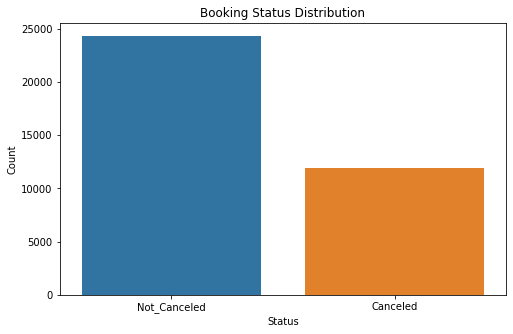

Not_Canceled    0.671713
Canceled        0.328287
Name: booking_status, dtype: float64


In [32]:
#seaborn barplot to show sentiment distribution (class imbalance!!)
plt.figure(figsize=(8, 5))
sns.countplot(x='booking_status', data=data_cleaned, order=data_cleaned['booking_status'].value_counts().index)
plt.title('Booking Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
#plt.savefig('cancellation_distribution.jpg')
plt.show();

print(data_cleaned['booking_status'].value_counts(normalize=True))

### Identify Features and Target & Train, Test, Split Data:

In [33]:
#define full set of features and target
X = data_cleaned.drop(['is_canceled', 'booking_status'], axis=1)
y = data_cleaned['is_canceled']

#train, test, split (setting stratify=y to make sure the proportion of target values is the same in train and test sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (27147, 17)
X_test shape: (9050, 17)


In [37]:
#create dummy model to show baseline to improve upon using 'most_frequent':
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)

#fit model to training data
dummy_model.fit(X_train, y_train)

#predict test data
y_pred_dummy = dummy_model.predict(X_test)

# 3. Evaluate the Baseline
print("Dummy Classifier Baseline Results")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dummy))

print("\nDummy Classifier Classification Report:")
print(classification_report(y_test, y_pred_dummy, target_names=['Not_Canceled (0)', 'Canceled (1)']))

Dummy Classifier Baseline Results
Confusion Matrix:
[[6079    0]
 [2971    0]]

Dummy Classifier Classification Report:
                  precision    recall  f1-score   support

Not_Canceled (0)       0.67      1.00      0.80      6079
    Canceled (1)       0.00      0.00      0.00      2971

        accuracy                           0.67      9050
       macro avg       0.34      0.50      0.40      9050
    weighted avg       0.45      0.67      0.54      9050



If we guessed the majority target class (Not Cancelled) for every reservation, we would have an accuracy of about 67% and Precision and Recall of 0%. In the following section, we try different classification models to improve these metrics.

## Modeling:

In [38]:
#define categorical features to be OneHotEncoded:
cat_features = [
    'type_of_meal_plan', 
    'room_type_reserved', 
    'market_segment_type', 
    'required_car_parking_space', 
    'repeated_guest',             
    'arrival_year']

In [39]:
#OneHotEncoder for categorical features:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

#define ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features)
    ],
    remainder='passthrough')

### Logistic Regression:

In [40]:
#Create Logistic Regression Pipeline:

#define model, using class_weight set to balanced as target class is unbalanced
logreg_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    random_state=42)

#create the pipeline using preprocessor and logreg model:
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)])

In [41]:
#fit the pipeline on training data:
pipeline_logreg.fit(X_train, y_train)

#predict on test data
y_pred_lr_pipe = pipeline_logreg.predict(X_test)

print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr_pipe, target_names=['Not_Canceled (0)', 'Canceled (1)']))

Logistic Regression Classification Report
                  precision    recall  f1-score   support

Not_Canceled (0)       0.87      0.79      0.83      6079
    Canceled (1)       0.64      0.76      0.69      2971

        accuracy                           0.78      9050
       macro avg       0.75      0.77      0.76      9050
    weighted avg       0.79      0.78      0.78      9050



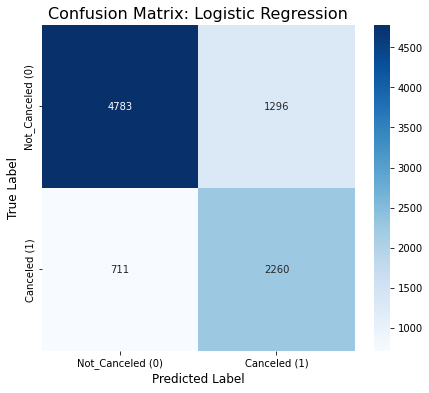

In [42]:
#Create and Plot Confusion Matrix:

#confusion matrix values
logreg_cm = confusion_matrix(y_test, y_pred_lr_pipe)
labels = ['Not_Canceled (0)', 'Canceled (1)']

#plot using Seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    logreg_cm, 
    annot=True,              
    fmt='d',                 
    cmap='Blues',            
    xticklabels=labels,      
    yticklabels=labels       
)

plt.title('Confusion Matrix: Logistic Regression', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show();

In [53]:
#get probabilities for ROC AUC
y_proba_lr_pipe = pipeline_logreg.predict_proba(X_test)[:, 1]
auc_score_lr = roc_auc_score(y_test, y_proba_lr_pipe)
auc_score_lr

0.859735046946385

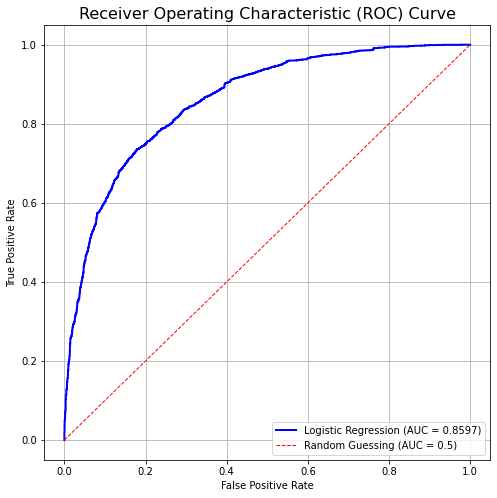

In [55]:
#Plot ROC Curve:
#calculate the ROC metrics (FalsePositiveRate and TruePositiveRate)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr_pipe)

#create plot:
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_score_lr:.4f})", color='blue', linewidth=2)

#add line for baseline- random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing (AUC = 0.5)', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show();

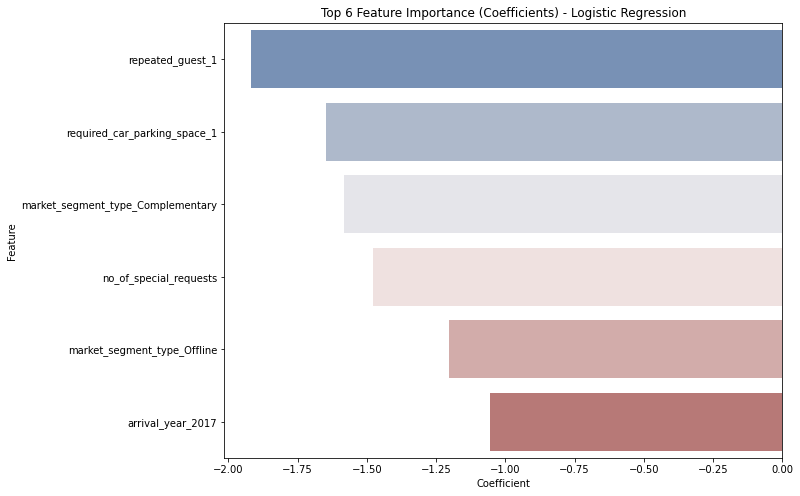


Top 5 Most Important Features (Magnitude and Direction):
                              Feature  Coefficient
17                   repeated_guest_1    -1.919090
15       required_car_parking_space_1    -1.648762
10  market_segment_type_Complementary    -1.581964
30             no_of_special_requests    -1.478808
12        market_segment_type_Offline    -1.204615


In [62]:
# 1. Access the trained Logistic Regression model from the pipeline
lr_model_fitted = pipeline_logreg['classifier']

# 2. Get the feature names from the ColumnTransformer
# Get the names of the ONE-HOT ENCODED features
ohe_feature_names = pipeline_logreg['preprocessor'].named_transformers_['cat'].get_feature_names(
    cat_features # Reuses your existing categorical_features list
)
# Get the names of the PASSTHROUGH (numerical) features
numerical_features = list(X_train.drop(columns=cat_features).columns)

# Combine the names in the order they appear in the processed array
feature_names = np.concatenate([ohe_feature_names, numerical_features])

# 3. Create a DataFrame for coefficients
coefficient_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model_fitted.coef_[0] # Use [0] as it's a 2D array for binary classification
})

# Sort by the absolute magnitude of the coefficient
coefficient_df['Magnitude'] = coefficient_df['Coefficient'].abs()
coefficient_df = coefficient_df.sort_values(by='Magnitude', ascending=False)

# 4. Plot the top features
top_n = 6
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coefficient_df.head(top_n), 
    palette='vlag' # Good for showing positive/negative values
)
plt.title(f'Top {top_n} Feature Importance (Coefficients) - Logistic Regression')
plt.show()

print("\nTop 5 Most Important Features (Magnitude and Direction):")
print(coefficient_df[['Feature', 'Coefficient']].head())

### Random Forest Model:

In [50]:
#Create Random Forest Pipeline:

#define Random Forest model again setting class_weight to balanced:
rf_model = RandomForestClassifier(
    n_estimators=200,          
    class_weight='balanced',   
    random_state=42,
    n_jobs=-1)

#create the pipeline using preprocessor and Random Forest model:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', rf_model)])

In [51]:
#fit the pipeline on training data:
pipeline_rf.fit(X_train, y_train)

#predict on test data
y_pred_rf = pipeline_rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf, target_names=['Not_Canceled (0)', 'Canceled (1)']))

Random Forest Classification Report
                  precision    recall  f1-score   support

Not_Canceled (0)       0.91      0.94      0.92      6079
    Canceled (1)       0.86      0.81      0.84      2971

        accuracy                           0.90      9050
       macro avg       0.89      0.87      0.88      9050
    weighted avg       0.89      0.90      0.89      9050



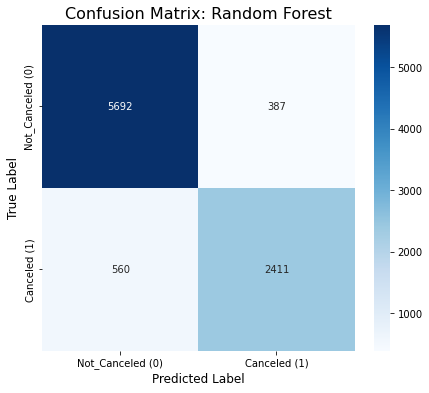

In [52]:
#Create and Plot Confusion Matrix:

#confusion matrix values
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels = ['Not_Canceled (0)', 'Canceled (1)']

#plot using Seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_rf, 
    annot=True,              
    fmt='d',                 
    cmap='Blues',            
    xticklabels=labels,      
    yticklabels=labels       
)

plt.title('Confusion Matrix: Random Forest', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show();

In [56]:
#get probabilities for ROC AUC
y_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1] 
auc_score_rf = roc_auc_score(y_test, y_proba_rf)
auc_score_rf

0.9510402111013471

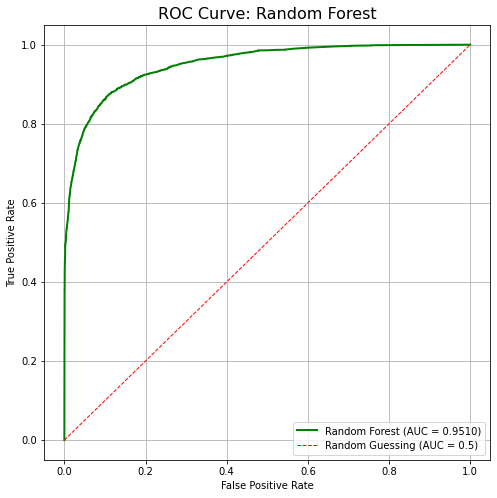

In [57]:
#Plot ROC Curve:
#calculate the ROC metrics (FalsePositiveRate and TruePositiveRate)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

#create plot:
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_score_rf:.4f})", color='green', linewidth=2)
#add line for baseline- random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing (AUC = 0.5)', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show();

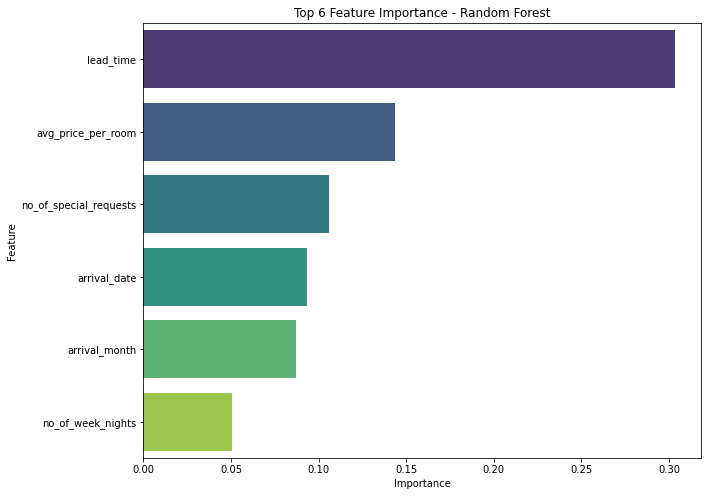


Top 5 Most Important Features:
                   Feature  Importance
24               lead_time    0.303399
29      avg_price_per_room    0.143641
30  no_of_special_requests    0.105780
26            arrival_date    0.093139
25           arrival_month    0.087255


In [61]:
# 1. Access the trained Random Forest model from the pipeline
# The model is the 'classifier' step in the pipeline.
rf_model_fitted = pipeline_rf['classifier']

# 2. Get the feature importance scores
importances = rf_model_fitted.feature_importances_

# 3. Get the feature names from the ColumnTransformer
# The list includes one-hot encoded columns first, then the remaining numerical ones.

# Get the names of the ONE-HOT ENCODED features
ohe_feature_names = pipeline_rf['preprocessor'].named_transformers_['cat'].get_feature_names(
    cat_features
)
# Get the names of the PASSTHROUGH (numerical) features
# We need to know which columns were passed through, based on the original X_train columns.
numerical_features = list(X_train.drop(columns=cat_features).columns)

# Combine the names in the order they appear in the processed array
feature_names = np.concatenate([ohe_feature_names, numerical_features])

# 4. Create a DataFrame for easy sorting and plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 5. Plot the top features
top_n = 6 # Select the top 6 features to plot
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df.head(top_n), 
    palette='viridis'
)
plt.title(f'Top {top_n} Feature Importance - Random Forest')
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head())